In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
labels = []
pixels = []
for chunk in pd.read_csv('character+font+images.csv', chunksize=10000):
    labels.extend(chunk['m_label'].values)
    pixels.extend(chunk.iloc[:, 12:].values / 255.0)

labels = torch.tensor(labels, dtype=torch.long)
pixels = np.array(pixels, dtype=np.float32)
pixels = torch.tensor(pixels)
print('here1')
train_data, temp_data, train_labels, temp_labels = train_test_split(pixels.numpy(), labels.numpy(), test_size=0.2, random_state=42)

val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.5, random_state=42
)

train_data = torch.tensor(train_data, dtype=torch.float32)
val_data = torch.tensor(val_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

torch.save({'train_data': train_data, 'train_labels': train_labels}, 'preprocessed_data_train.pt')
torch.save({'val_data': val_data, 'val_labels': val_labels}, 'preprocessed_data_val.pt') 
torch.save({'test_data': test_data, 'test_labels': test_labels}, 'preprocessed_data_test.pt')

here1


In [3]:
train_data = torch.load('preprocessed_data_train.pt')
val_data = torch.load('preprocessed_data_val.pt')
test_data = torch.load('preprocessed_data_test.pt')

print(f"Train data keys: {train_data.keys()}")
print(f"Validation data keys: {val_data.keys()}")
print(f"Test data keys: {test_data.keys()}")

print(f"Train data shape: {train_data['train_data'].shape}")
print(f"Train labels shape: {train_data['train_labels'].shape}")
print(f"Validation data shape: {val_data['val_data'].shape}")
print(f"Validation labels shape: {val_data['val_labels'].shape}")
print(f"Test data shape: {test_data['test_data'].shape}")
print(f"Test labels shape: {test_data['test_labels'].shape}")

print("Sample train data: ", train_data['train_data'][:5])
print("Sample train labels: ", train_data['train_labels'][:5])
print("Sample validation data: ", val_data['val_data'][:5])
print("Sample validation labels: ", val_data['val_labels'][:5])
print("Sample test data: ", test_data['test_data'][:5])
print("Sample test labels: ", test_data['test_labels'][:5])

Train data keys: dict_keys(['train_data', 'train_labels'])
Validation data keys: dict_keys(['val_data', 'val_labels'])
Test data keys: dict_keys(['test_data', 'test_labels'])
Train data shape: torch.Size([666136, 400])
Train labels shape: torch.Size([666136])
Validation data shape: torch.Size([83267, 400])
Validation labels shape: torch.Size([83267])
Test data shape: torch.Size([83267, 400])
Test labels shape: torch.Size([83267])
Sample train data:  tensor([[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [0.5922, 0.6039, 0.6157,  ..., 0.6745, 0.6431, 0.6196],
        [0.4784, 0.4784, 0.9137,  ..., 0.9569, 0.6196, 0.4784]])
Sample train labels:  tensor([1109,   88,   46,   48,   88])
Sample validation data:  tensor([[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [1.

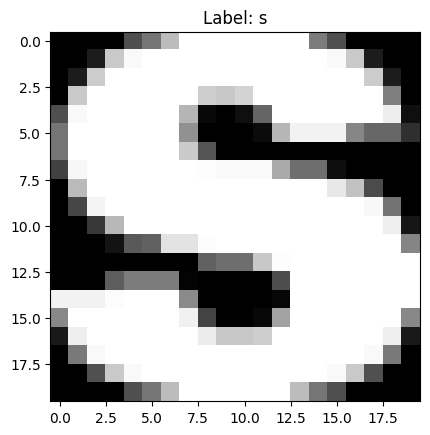

In [4]:
import matplotlib.pyplot as plt

image = train_data['train_data'][0]
label = train_data['train_labels'][0]

image = image.view(20, 20)

plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label.item())}")
plt.show()